# Lecture 6: Advanced regression in Python and Ethics in Machine Learning

# Advanced regression: Practical approach in Python

First, let's start with practical approach to doing advanced regression in Python.

First, we will start with a Polynomial Regression method:

## Polynomial regression

*What It Is*: Polynomial regression extends linear regression by adding combinations of the original features. For example, instead of just fitting a line, it might fit a curve by adding squared terms (e.g., X2) or even higher powers.

*How It Works*: In polynomial regression, we create new “features” by raising the original feature values to higher powers. These new features allow the model to bend and fit data that follows a non-linear trend.

*Example*: Imagine predicting the height of a plant over time. Initially, growth might be slow, then accelerate, and eventually level off. Linear regression might not fit this data well, but polynomial regression can create a curve that better matches the plant’s growth pattern.

Mean Squared Error (MSE): 0.309
R² Score: 0.285


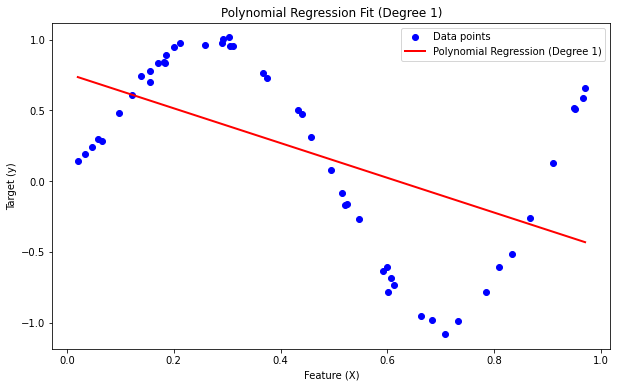

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.sort(np.random.rand(50, 1) * 1, axis=0)  # Feature values between 0 and 10
y = np.sin(5.3 * X.squeeze() + 1.95 * X.squeeze() ** 2) + np.random.normal(0, 0.04, X.shape[0])  # Quadratic relationship with noise


# Polynomial transformation
degree = 1  # Degree of the polynomial (e.g., quadratic)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit linear regression on the transformed polynomial features
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Visualize the polynomial regression fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, y_pred, color='red', linewidth=2, label=f"Polynomial Regression (Degree {degree})")
plt.title(f"Polynomial Regression Fit (Degree {degree})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()


So, let's code this in practice, from the scratch.

First, let's see our data:

In [3]:
np.random.seed(42)
X = np.sort(np.random.rand(50, 1) * 1, axis=0)  # Feature values between 0 and 10
y = np.sin(5.3 * X.squeeze() + 1.95 * X.squeeze() ** 2) + np.random.normal(0, 0.04, X.shape[0])  # Quadratic relationship with noise

Let's plot it:

There is a trick to get PolynomialRegression:

After that, we proceed as we would like proceed with a standard Linear Regression.

## Advanced models

Let's now get familiar with some advanced regression models.

We'll do a little experiment, applying these models on the California Housing dataset and trying to find the best algorithm to do that task for us.

First, let's apply Polynomial Regression to this dataset.

We got our dataset:

In [4]:
import pandas as pd # pandas
import numpy as np # numpy
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()
# Convert to DataFrame for easier handling
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  # Target variable (median house value)


Now, let's implement the model

## Okay, now let's go with advanced models!

### Support Vector Regression (SVR)

Support Vector Regression (SVR) is an algorithm based on the principles of Support Vector Machines (SVM), used for regression. The goal of SVR is to find a line, curve, or surface that best maps the relationship between the input and output variables. Here are the key aspects of how SVR works:

Support vectors refer to the use of the "most important" points to fit the model.

#### Epsilon-Tube Principle

SVR does not try to exactly fit the model to every data point. Instead, it defines a certain margin of error, called epsilon (ε), within which the model tolerates differences between the predicted and actual values.

    If a data point lies within this margin, it is considered "well fitted" and does not affect the final solution.
    Points outside the margin (lying outside the epsilon-tube) contribute to the error and are penalized in the cost function.

#### Optimization and Margins

The goal of SVR is to find a line/curve/surface that:

    Minimizes deviation from the data while allowing for ε tolerance.
    Maximizes the flatness of the function, which means regularization.

The optimization formula in SVR takes into account two aspects:

    Minimizing ||w||² (restricting the model to be simple).
    Minimizing errors for points outside the epsilon-tube (difficult-to-predict points are penalized proportionally to their distance from the margin).

#### Penalty for Deviations - Parameter C

The parameter C controls the trade-off between fitting the model to the data and its overall complexity:

    Low C: The model is more flexible, allowing for larger errors, which may result in underfitting.
    High C: The model tries harder to fit the training data, which may lead to overfitting.

#### Kernel and Feature Space

SVR can work with nonlinear data thanks to the so-called kernel tricks:

    A kernel transforms the data into a higher-dimensional space where a linear hyperplane (e.g., a regression line) can be more easily found.

#### Popular kernels include:

    Linear (simple linear regression)
    Polynomial (polynomial model)
    RBF (nonlinear model with a radial basis function, suitable for complex data)

#### Epsilon and Cost Function

The parameter ε (epsilon) defines the width of the tolerance margin:

    Smaller epsilon: The model strives to fit the data more closely, which may result in overfitting.
    Larger epsilon: The model is more tolerant of errors and ignores minor deviations.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import interact

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = X.ravel() + 4 * (0.5 - np.random.rand(50))

# Function to plot SVR with interactive controls
def plot_svr(C=1.0, epsilon=0.1, kernel='rbf'):
    # Train SVR model
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X, y)
    
    # Generate predictions
    X_fit = np.linspace(0, 5, 500).reshape(-1, 1)
    y_fit = svr.predict(X_fit)
    
    # Plot data and SVR predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='Data points')
    plt.plot(X_fit, y_fit, color='blue', label='SVR prediction')
    plt.fill_between(
        X_fit.ravel(),
        y_fit - epsilon,
        y_fit + epsilon,
        color='blue',
        alpha=0.2,
        label=f"Epsilon-tube (ε={epsilon})"
    )
    plt.title(f"Support Vector Regression (Kernel: {kernel}, C={C}, ε={epsilon})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Create interactive widget
interact(
    plot_svr,
    C=(0.1, 100.0, 0.1),
    epsilon=(0.01, 1.0, 0.01),
    kernel=['linear', 'poly', 'rbf']
)


interactive(children=(FloatSlider(value=1.0, description='C', min=0.1), FloatSlider(value=0.1, description='ep…

<function __main__.plot_svr(C=1.0, epsilon=0.1, kernel='rbf')>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import interact

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() + 0.3 * (0.5 - np.random.rand(50))

# Function to plot SVR with interactive controls
def plot_svr(C=1.0, epsilon=0.1, kernel='rbf'):
    # Train SVR model
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X, y)
    
    # Generate predictions
    X_fit = np.linspace(0, 5, 500).reshape(-1, 1)
    y_fit = svr.predict(X_fit)
    
    # Plot data and SVR predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='Data points')
    plt.plot(X_fit, y_fit, color='blue', label='SVR prediction')
    plt.fill_between(
        X_fit.ravel(),
        y_fit - epsilon,
        y_fit + epsilon,
        color='blue',
        alpha=0.2,
        label=f"Epsilon-tube (ε={epsilon})"
    )
    plt.title(f"Support Vector Regression (Kernel: {kernel}, C={C}, ε={epsilon})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Create interactive widget
interact(
    plot_svr,
    C=(0.1, 10000.0, 0.1),
    epsilon=(0.01, 10.0, 0.01),
    kernel=['linear', 'poly', 'rbf']
)


interactive(children=(FloatSlider(value=1.0, description='C', max=10000.0, min=0.1), FloatSlider(value=0.1, de…

<function __main__.plot_svr(C=1.0, epsilon=0.1, kernel='rbf')>

# **k-Nearest Neighbors Regression (k-NN Regression)**

k-Nearest Neighbors Regression (k-NN Regression) is a simple yet powerful machine learning algorithm that uses distances between data points to predict continuous values. It is a non-parametric method, meaning it does not assume a specific form of the relationship between features and target values.

---

## **How Does k-NN Work in Regression?**

1. **Training Data Collection**:
   - The algorithm memorizes all the training data and does not build any preliminary model.

2. **For a New Sample (Test Point)**:
   - **Step 1**: Compute the distances between the new sample and all points in the training set.
     - Commonly used distance metrics are:
       - **Euclidean Distance**:
         $$
         d(x, x') = \sqrt{\sum_{i=1}^n (x_i - x'_i)^2}
         $$
       - **Manhattan Distance**:
         $$
         d(x, x') = \sum_{i=1}^n |x_i - x'_i|
         $$
   - **Step 2**: Select the \( k \) nearest neighbors (smallest distances) to the test point.

3. **Predicting the Target Value**:
   - The predicted value for the test point is the **mean target value \( y \)** of the nearest neighbors:
     $$
     \hat{y} = \frac{1}{k} \sum_{i=1}^k y_i
     $$
   - Weighted averages can also be used, where closer neighbors have a larger influence on the result:
     $$
     \hat{y} = \frac{\sum_{i=1}^k w_i \cdot y_i}{\sum_{i=1}^k w_i}
     $$
     where \( w_i \) is the inverse of the distance to the neighbor \( w_i = \frac{1}{d(x, x'_i) + \epsilon} \), and \( \epsilon \) is a small value to avoid division by zero.

4. **Repeat for All Test Points**:
   - The algorithm performs the above steps for each sample in the test set.

---

## **k-NN Hyperparameters**

1. **Number of Neighbors \( k \)**:
   - **Small \( k \)**:
     - The model is more sensitive to noise in the data (prone to overfitting).
   - **Large \( k \)**:
     - The model averages values over a broader range, which may lead to underfitting.

2. **Distance Metric**:
   - The most commonly used metric is Euclidean distance, but others like Manhattan, Minkowski, or specialized metrics can be applied.

3. **Neighbor Weights**:
   - By default, all neighbors have equal weights.
   - Distance-based weights can be used so that closer neighbors have a greater influence.

---

## **Advantages of k-NN Regression**

1. **Simplicity**:
   - The algorithm is easy to understand and implement.

2. **Flexibility**:
   - Works well with data having complex and non-linear relationships.

3. **No Assumptions**:
   - Does not require any prior assumptions about the data distribution.

---

## **Disadvantages of k-NN Regression**

1. **Computational Cost**:
   - The algorithm requires distance computations for all points in the training set for each test sample, which can be expensive for large datasets.

2. **Sensitivity to Data**:
   - Sensitive to noise and outliers, especially for small \( k \).

3. **Scaling Issues**:
   - The algorithm is sensitive to differences in the scale of features, so standardization or normalization of data is usually necessary.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
X_train, X_test = X[:160], X[160:]
y_train, y_test = y[:160], y[160:]

# Interactive function for k-NN
def interactive_knn(n_neighbors=3, weights='uniform'):
    # Train k-NN regressor
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, p=1)
    knn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Plot training data, test data, and predictions
    plt.figure(figsize=(12, 6))
    
    # Scatter plot of training and test data
    plt.scatter(X_train, y_train, label="Training Data", color='blue', alpha=0.7)
    plt.scatter(X_test, y_test, label="Test Data", color='orange', alpha=0.7)
    
    # Line plot of predictions
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred_range = knn.predict(X_range)
    plt.plot(X_range, y_pred_range, color='red', label="k-NN Predictions", linewidth=2)
    
    # Titles and labels
    plt.title(f"k-NN Regression (k={n_neighbors}, weights='{weights}')\nMSE: {mse:.2f}")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for k and weights
interact(
    interactive_knn,
    n_neighbors=widgets.IntSlider(min=1, max=20, step=1, value=3, description='k (Neighbors)'),
    weights=widgets.RadioButtons(
        options=['uniform', 'distance'],
        value='uniform',
        description='Weights:'
    )
)


interactive(children=(IntSlider(value=3, description='k (Neighbors)', max=20, min=1), RadioButtons(description…

<function __main__.interactive_knn(n_neighbors=3, weights='uniform')>

# **Decision Trees**

Decision trees are a popular machine learning algorithm that can be used for both classification and regression tasks. For regression, decision trees are employed to predict continuous values, making them a powerful tool for modeling data with nonlinear and complex relationships.

---

## **Structure of a Decision Tree**

A decision tree is a diagram-like structure where data is split based on logical conditions, forming nodes and branches.

- **Root Node**: The starting point, containing all input data.
- **Decision Nodes**: Points where the data is split based on a specific condition (e.g., the feature that best explains the data at that point).
- **Leaves**: Terminal nodes representing the predicted value in the case of regression.

---

## **Regression Using Decision Trees**

### Data Splitting - The Learning Process

The tree iteratively splits the input data into subsets based on a chosen feature and condition that minimizes prediction error.

- For example: "Apartment area > 50m² → yes or no" divides the data into two subsets, each with a specific predicted value.

Metrics such as Mean Squared Error (MSE) or Mean Absolute Error (MAE) are used to determine the best split.

- **Splitting Criterion**: The difference between the actual value and the mean value in the resulting subgroup.

The algorithm continues splitting until it reaches a stopping criterion, such as:

- Minimum number of samples in a leaf,
- Maximum depth of the tree,
- No further improvement in error.

---

### Prediction

The predicted value at a leaf node is the mean of the target values in that data subset.

---

## **Advantages**

- Trees are very simple to use and intuitive.
- They handle highly nonlinear relationships effectively.
- No need for data scaling.

---

## **Disadvantages**

- Trees are prone to overfitting.
- Predictions are averages, leading to step-like outputs.

---

## **When to Use Decision Trees**

- When the data is highly nonlinear.
- When model interpretability is crucial.
- When there are complex interactions between features that are difficult to model with methods like polynomial regression.


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Import additional library for tree visualization
from sklearn.tree import plot_tree

# Adjust interactive function to include tree visualization
def interactive_tree_with_plot(max_depth=3, min_samples_split=2, min_samples_leaf=1):
    # Train the Decision Tree Regressor with selected hyperparameters
    regressor = DecisionTreeRegressor(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train, y_train)
    
    # Predict on the training and test set
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)
    
    # Calculate Mean Squared Error
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    # Create subplots for predictions and tree structure
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot the data and the regression tree predictions
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred_range = regressor.predict(X_range)
    
    axs[0].scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
    axs[0].scatter(X_test, y_test, color='orange', label='Test Data', alpha=0.6)
    axs[0].plot(X_range, y_pred_range, color='red', label='Tree Prediction', linewidth=2)
    axs[0].set_title(f"Decision Tree Regressor\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    axs[0].set_xlabel("Feature")
    axs[0].set_ylabel("Target")
    axs[0].legend()
    axs[0].grid(True)
    
    # Visualize the decision tree structure
    plot_tree(regressor, filled=True, feature_names=["Feature"], ax=axs[1])
    axs[1].set_title("Decision Tree Structure")
    
    plt.tight_layout()
    plt.show()

# Interactive widgets for hyperparameters
interact(
    interactive_tree_with_plot,
    max_depth=widgets.IntSlider(min=1, max=10, step=1, value=3, description='Max Depth'),
    min_samples_split=widgets.IntSlider(min=2, max=20, step=1, value=2, description='Min Samples Split'),
    min_samples_leaf=widgets.IntSlider(min=1, max=10, step=1, value=1, description='Min Samples Leaf')
)


interactive(children=(IntSlider(value=3, description='Max Depth', max=10, min=1), IntSlider(value=2, descripti…

<function __main__.interactive_tree_with_plot(max_depth=3, min_samples_split=2, min_samples_leaf=1)>

In [9]:
# Generate a more non-linear dataset
np.random.seed(42)
X_nl = np.sort(np.random.rand(200, 1) * 10, axis=0)  # Random values between 0 and 10
y_nl = np.sin(X_nl).ravel() + np.random.normal(0, 0.2, X_nl.shape[0])  # Sinusoidal with noise

# Split into training and testing sets
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)

# Interactive function for non-linear example
def interactive_tree_with_plot_nonlinear(max_depth=3, min_samples_split=2, min_samples_leaf=1):
    # Train the Decision Tree Regressor with selected hyperparameters
    regressor = DecisionTreeRegressor(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train_nl, y_train_nl)
    
    # Predict on the training and test set
    y_pred_train_nl = regressor.predict(X_train_nl)
    y_pred_test_nl = regressor.predict(X_test_nl)
    
    # Calculate Mean Squared Error
    train_mse = mean_squared_error(y_train_nl, y_pred_train_nl)
    test_mse = mean_squared_error(y_test_nl, y_pred_test_nl)
    
    # Create subplots for predictions and tree structure
    fig, axs = plt.subplots(2, 1, figsize=(18, 16))
    
    # Plot the data and the regression tree predictions
    X_range = np.linspace(X_nl.min(), X_nl.max(), 500).reshape(-1, 1)
    y_pred_range = regressor.predict(X_range)
    
    axs[0].scatter(X_train_nl, y_train_nl, color='blue', label='Training Data', alpha=0.6)
    axs[0].scatter(X_test_nl, y_test_nl, color='orange', label='Test Data', alpha=0.6)
    axs[0].plot(X_range, y_pred_range, color='red', label='Tree Prediction', linewidth=2)
    axs[0].set_title(f"Decision Tree Regressor (Non-Linear Example)\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    axs[0].set_xlabel("Feature")
    axs[0].set_ylabel("Target")
    axs[0].legend()
    axs[0].grid(True)
    
    # Visualize the decision tree structure
    plot_tree(regressor, filled=True, feature_names=["Feature"], ax=axs[1])
    axs[1].set_title("Decision Tree Structure")
    
    plt.tight_layout()
    plt.show()

# Interactive widgets for hyperparameters
interact(
    interactive_tree_with_plot_nonlinear,
    max_depth=widgets.IntSlider(min=1, max=10, step=1, value=3, description='Max Depth'),
    min_samples_split=widgets.IntSlider(min=2, max=20, step=1, value=2, description='Min Samples Split'),
    min_samples_leaf=widgets.IntSlider(min=1, max=10, step=1, value=1, description='Min Samples Leaf')
)


interactive(children=(IntSlider(value=3, description='Max Depth', max=10, min=1), IntSlider(value=2, descripti…

<function __main__.interactive_tree_with_plot_nonlinear(max_depth=3, min_samples_split=2, min_samples_leaf=1)>

## Let's compare how these models perform on our California Housing dataset!